In [2]:
import pandas as pd

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
user=pd.read_csv('data/JData_User.csv',encoding='gbk')

In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103616 entries, 0 to 103615
Data columns (total 5 columns):
user_id        103616 non-null int64
age            103616 non-null object
sex            103616 non-null int64
user_lv_cd     103616 non-null int64
user_reg_dt    103616 non-null object
dtypes: int64(3), object(2)
memory usage: 4.0+ MB


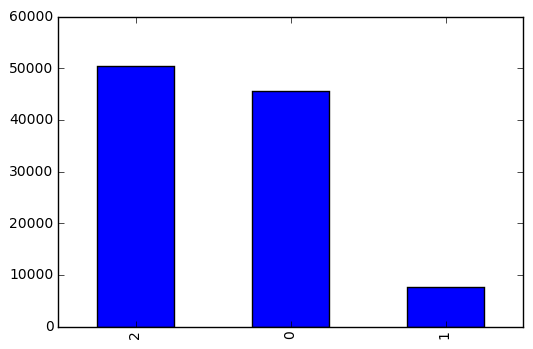

In [8]:
user['sex'].value_counts().plot(kind='bar')

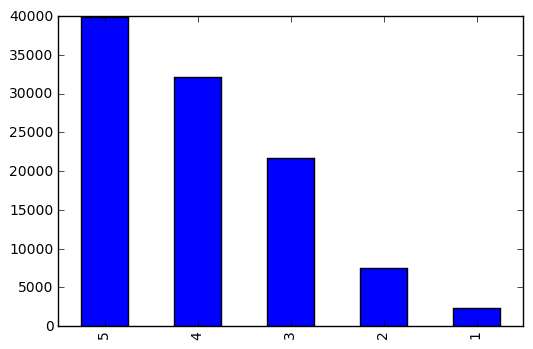

In [9]:
user['user_lv_cd'].value_counts().plot(kind='bar')

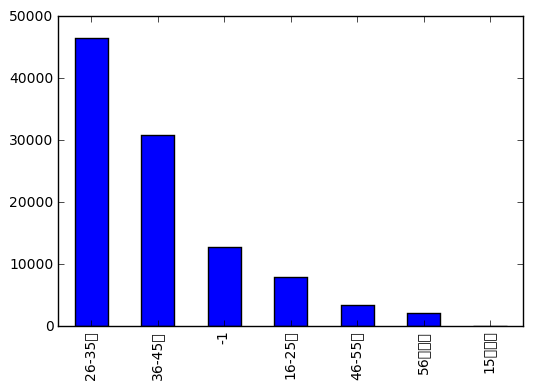

In [10]:
user['age'].value_counts().plot(kind='bar')

In [11]:
comment = pd.read_csv('data/JData_Comment.csv',encoding='gbk')

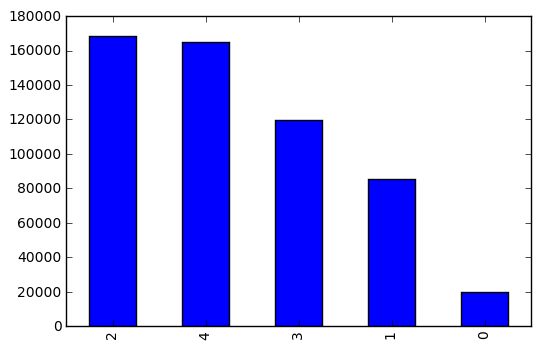

In [12]:
comment['comment_num'].value_counts().plot(kind='bar') 


In [13]:
action2 = pd.read_csv('data/JData_Action_201602.csv',encoding='gbk')
action31 = pd.read_csv('data/JData_Action_201603.csv',encoding='gbk')
action32 = pd.read_csv('data/JData_Action_201603_extra.csv',encoding="gbk")
action4 = pd.read_csv('data/JData_Action_201604.csv',encoding='gbk')

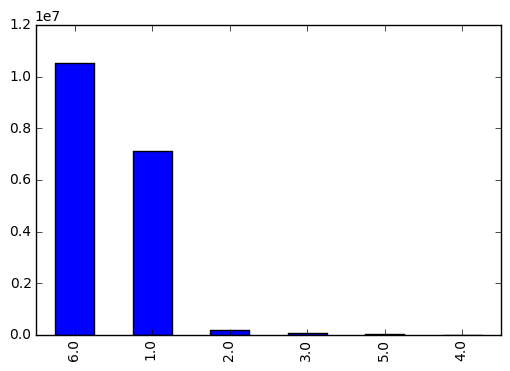

In [14]:
action2.type.value_counts().plot(kind='bar')

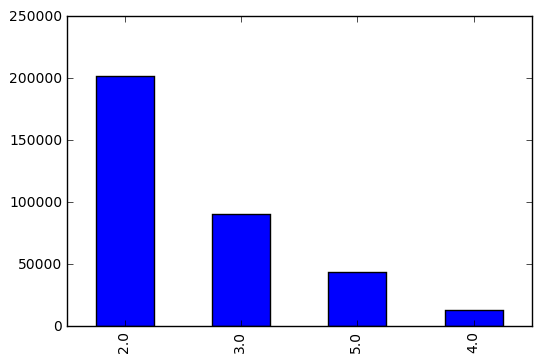

In [15]:
action2[(action2['type']!=6) & (action2['type']!=1)]['type'].value_counts().plot(kind='bar')


In [17]:
action_df=pd.concat([action2,action31,action32,action4])
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79489205 entries, 0 to 19635084
Data columns (total 7 columns):
user_id     int64
sku_id      int64
time        object
model_id    float64
type        float64
cate        float64
brand       float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.7+ GB


In [23]:
sku_action_df=action_df.groupby(['sku_id','type'],as_index=False)['user_id'].count()
sku_action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99672 entries, 0 to 99671
Data columns (total 3 columns):
sku_id     99672 non-null int64
type       99672 non-null float64
user_id    99672 non-null int64
dtypes: float64(1), int64(2)
memory usage: 3.0 MB


In [24]:
sku_pivot_table=sku_action_df.pivot_table('user_id',index='sku_id',columns='type',aggfunc=sum)
sku_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31485 entries, 2 to 171225
Data columns (total 6 columns):
1.0    30922 non-null float64
2.0    13393 non-null float64
3.0    11507 non-null float64
4.0    4377 non-null float64
5.0    9371 non-null float64
6.0    30102 non-null float64
dtypes: float64(6)
memory usage: 1.7 MB


In [37]:
sku_pivot_table.fillna(0,inplace=True)
sku_pivot_table.head(10)

type,1.0,2.0,3.0,4.0,5.0,6.0
sku_id,,,,,,
2,107.0,0.0,0.0,0.0,0.0,148.0
18,2.0,0.0,0.0,0.0,0.0,5.0
23,1.0,0.0,0.0,0.0,0.0,1.0
36,138.0,1.0,1.0,0.0,1.0,174.0
37,18.0,0.0,0.0,0.0,0.0,20.0
40,216.0,2.0,2.0,0.0,0.0,390.0
41,1.0,0.0,0.0,0.0,0.0,0.0
43,489.0,8.0,5.0,0.0,2.0,755.0
44,14.0,0.0,0.0,0.0,0.0,42.0


In [26]:
user_action_df=action_df.groupby(['user_id','type'],as_index=False)['time'].count()
user_action_df.head(10)

,user_id,type,time
0,1,1.0,180
1,1,6.0,259
2,2,1.0,184
3,2,6.0,288
4,3,1.0,53
5,3,2.0,2
6,3,3.0,1
7,3,4.0,2
8,3,5.0,1
9,3,6.0,145


In [28]:
user_pivot_table=user_action_df.pivot_table('time',index='user_id',columns='type',aggfunc=sum)

In [34]:
user_pivot_table.fillna(0,inplace=True)

In [35]:
user_pivot_table.head(10)

type,1.0,2.0,3.0,4.0,5.0,6.0
user_id,,,,,,
1,180.0,0.0,0.0,0.0,0.0,259.0
2,184.0,0.0,0.0,0.0,0.0,288.0
3,53.0,2.0,1.0,2.0,1.0,145.0
4,62.0,0.0,0.0,0.0,0.0,75.0
5,25.0,0.0,0.0,0.0,0.0,24.0
6,340.0,3.0,2.0,1.0,0.0,453.0
7,138.0,6.0,2.0,1.0,0.0,330.0
8,60.0,2.0,0.0,0.0,0.0,62.0
9,56.0,5.0,1.0,1.0,0.0,84.0


In [40]:
sku_pivot_table['change_rate']=sku_pivot_table[4.0]/sku_pivot_table[1.0]

In [42]:
sku_pivot_table[sku_pivot_table['change_rate']!=0].head(10)

type,1.0,2.0,3.0,4.0,5.0,6.0,change_rate
sku_id,,,,,,,
50,1784.0,33.0,23.0,3.0,7.0,2551.0,0.001682
52,1651.0,31.0,12.0,1.0,6.0,2396.0,0.000606
156,13545.0,322.0,129.0,18.0,86.0,19593.0,0.001329
169,9192.0,156.0,75.0,6.0,51.0,14667.0,0.000653
181,196.0,3.0,2.0,1.0,0.0,301.0,0.005102
208,0.0,0.0,0.0,0.0,0.0,1.0,NaN
211,8703.0,266.0,154.0,21.0,48.0,13978.0,0.002413
212,15.0,2.0,0.0,1.0,0.0,64.0,0.066667
251,0.0,0.0,0.0,1.0,0.0,0.0,inf


In [43]:
sku_pivot_table['change_rate'].describe()

count    3.092600e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max               inf
Name: change_rate, dtype: float64

In [44]:
user_pivot_table[6.0].describe()

count    103565.000000
mean        467.062009
std         720.847949
min           0.000000
25%         100.000000
50%         244.000000
75%         556.000000
max       43921.000000
Name: 6.0, dtype: float64

In [47]:
user_pivot_table[user_pivot_table[6.0]>=10000.0]

type,1.0,2.0,3.0,4.0,5.0,6.0
user_id,,,,,,
5150,9134.0,327.0,204.0,0.0,0.0,17769.0
5263,6951.0,105.0,81.0,0.0,21.0,15868.0
9264,5433.0,54.0,32.0,0.0,40.0,10597.0
14074,6252.0,7.0,6.0,0.0,0.0,11989.0
15861,5671.0,8.0,4.0,0.0,1.0,13706.0
18603,20618.0,255.0,173.0,0.0,1.0,43921.0
18605,7270.0,83.0,53.0,0.0,1.0,16288.0
19313,9214.0,191.0,61.0,1.0,1.0,10952.0
21014,6935.0,129.0,25.0,2.0,5.0,13765.0


In [48]:
action_df[(action_df['user_id']==27622) & (action_df['type']==1.0)]

,user_id,sku_id,time,model_id,type,cate,brand
14607,27622,80906,2016-02-01 10:21:45,NaN,1.0,5.0,427.0
14650,27622,17429,2016-02-01 10:11:57,NaN,1.0,5.0,427.0
16627,27622,120419,2016-02-01 10:27:09,NaN,1.0,9.0,427.0
19759,27622,136939,2016-02-01 10:46:20,NaN,1.0,9.0,427.0
19762,27622,42381,2016-02-01 10:40:49,NaN,1.0,9.0,427.0
19771,27622,120975,2016-02-01 10:28:44,NaN,1.0,9.0,427.0
19793,27622,56832,2016-02-01 10:27:46,NaN,1.0,9.0,427.0
26510,27622,159938,2016-02-01 10:05:11,NaN,1.0,6.0,427.0
26553,27622,18254,2016-02-01 09:59:12,NaN,1.0,6.0,427.0
26588,27622,121400,2016-02-01 10:23:12,NaN,1.0,5.0,427.0


In [49]:
product_df=pd.read_csv('data/JData_Product.csv',encoding="gbk")
product_df.head(10)

,sku_id,attr1,attr2,attr3,cate,brand
0,166731,1,-1,-1,8,545
1,146488,2,2,-1,8,812
2,70546,3,1,1,8,214
3,92487,2,2,-1,8,812
4,113065,2,2,-1,8,812
5,80307,2,2,-1,8,812
6,71669,2,1,-1,8,812
7,4145,2,2,1,8,812
8,35450,2,2,-1,8,812
9,131403,2,1,-1,8,812


In [50]:
product_df['attr1'].describe()

count    24187.000000
mean         2.176996
std          1.176116
min         -1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: attr1, dtype: float64

In [53]:
user_pivot_table['user_id']=user_pivot_table.index
merge_user=pd.merge(user_pivot_table,user,how='outer')
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26


In [60]:
merge_user['sum']=merge_user[2.0]+merge_user[3.0]+merge_user[4.0]+merge_user[5.0]

In [61]:
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26,0.0
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26,0.0
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10,6.0
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26,0.0
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10,0.0
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26,6.0
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24,9.0
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26,2.0
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10,7.0
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26,5.0


In [62]:
merge_user.groupby('age')['sum'].describe()

age          
-1      count    12790.000000
        mean         9.791087
        std         21.998350
        min          0.000000
        25%          0.000000
        50%          3.000000
        75%         11.000000
        max        874.000000
15岁以下   count        6.000000
        mean         1.500000
        std          1.974842
        min          0.000000
        25%          0.000000
        50%          1.000000
        75%          2.000000
        max          5.000000
16-25岁  count     7997.000000
        mean        13.460798
        std         24.475343
        min          0.000000
        25%          2.000000
        50%          6.000000
        75%         16.000000
        max        743.000000
26-35岁  count    46502.000000
        mean        15.295600
        std         29.999009
        min          0.000000
        25%          2.000000
        50%          7.000000
        75%         18.000000
        max       2746.000000
36-45岁  count    30818.000

In [63]:
merge_user.groupby('user_lv_cd')['sum'].describe()

user_lv_cd       
1           count     2326.000000
            mean         6.552451
            std         20.908455
            min          0.000000
            25%          0.000000
            50%          1.000000
            75%          6.000000
            max        485.000000
2           count     7512.000000
            mean         6.072684
            std         13.050501
            min          0.000000
            25%          0.000000
            50%          2.000000
            75%          7.000000
            max        382.000000
3           count    21676.000000
            mean         8.836178
            std         18.961180
            min          0.000000
            25%          1.000000
            50%          4.000000
            75%         10.000000
            max        830.000000
4           count    32190.000000
            mean        12.785306
            std         26.444238
            min          0.000000
            25%          2.000

In [67]:
merge_user[merge_user['user_reg_dt']>'2016/4/30'].count()

1.0            61
2.0            61
3.0            61
4.0            61
5.0            61
6.0            61
user_id        61
age            61
sex            61
user_lv_cd     61
user_reg_dt    61
sum            61
dtype: int64

In [72]:
comment[(comment['comment_num']==2) & (comment['bad_comment_rate']>=0.5)].count()

dt                  7026
sku_id              7026
comment_num         7026
has_bad_comment     7026
bad_comment_rate    7026
dtype: int64

In [75]:
sku_pivot_table['sku_id']=sku_pivot_table.index
merge_sku=pd.merge(sku_pivot_table,comment,how='outer')
merge_sku.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate
0,107.0,0.0,0.0,0.0,0.0,148.0,0.0,2,NaN,NaN,NaN,NaN
1,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-04-11,4.0,1.0,0.0144
2,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-03-14,4.0,1.0,0.0144
3,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-03-28,4.0,1.0,0.0144
4,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-02-22,4.0,1.0,0.0144
5,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-02-15,4.0,1.0,0.0144
6,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-02-08,4.0,1.0,0.0144
7,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-02-01,4.0,1.0,0.0144
8,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-04-04,4.0,1.0,0.0144
9,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-04-15,4.0,1.0,0.0144


In [78]:
merge_sku[(merge_sku['has_bad_comment']==0) & (merge_sku['comment_num']>0)][4.0].describe()

count    101286.000000
mean          0.218757
std           2.018031
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         156.000000
Name: 4.0, dtype: float64

In [82]:
action_df.groupby(['model_id'])['user_id'].count()

model_id
0.0      19708598
11.0       114115
12.0        38526
13.0       213550
14.0       163775
15.0        15818
16.0       111768
17.0       394206
18.0       102500
19.0       187609
21.0       499862
22.0        14116
23.0       188506
24.0       923084
25.0       141736
26.0      2048724
27.0      2354520
28.0       117417
29.0       738285
31.0       165488
32.0        18378
33.0        14668
34.0        16683
35.0        12645
36.0         7314
37.0         6249
38.0         6187
39.0         5085
110.0       38518
111.0      335498
           ...   
319.0        2291
320.0        2667
321.0        2508
322.0        2221
323.0        2135
324.0        1591
325.0        1915
326.0        1468
327.0        1452
328.0        1834
329.0        1501
330.0        1169
331.0        1460
332.0        1091
333.0        1337
334.0         955
335.0         944
336.0         906
337.0         895
338.0         875
339.0         965
340.0        1076
341.0         848
342.0         826
3

In [83]:
merge_sku[merge_sku['comment_num']==4][4.0].describe()

count    101959.000000
mean          5.751969
std          22.650082
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         597.000000
Name: 4.0, dtype: float64

In [84]:
merge_sku[merge_sku['comment_num']==3][4.0].describe()

count    49387.000000
mean         0.366250
std          2.180897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        156.000000
Name: 4.0, dtype: float64

In [85]:
merge_sku[merge_sku['comment_num']==2][4.0].describe()

count    62941.000000
mean         0.123957
std          0.988534
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        104.000000
Name: 4.0, dtype: float64

In [136]:
#删除规定时间之后注册的用户
clean_user=user[user['user_reg_dt']<='2016/4/30']
clean_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103555 entries, 0 to 103615
Data columns (total 5 columns):
user_id        103555 non-null int64
age            103555 non-null object
sex            103555 non-null int64
user_lv_cd     103555 non-null int64
user_reg_dt    103555 non-null object
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [91]:
merge_user[merge_user['sum']==0]['user_id'].head(10)

0      1
1      2
3      4
4      5
11    12
12    13
27    28
29    30
32    33
36    37
Name: user_id, dtype: int64

In [92]:
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26,0.0
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26,0.0
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10,6.0
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26,0.0
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10,0.0
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26,6.0
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24,9.0
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26,2.0
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10,7.0
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26,5.0


In [96]:
no_action_id_list=merge_user[(merge_user['sum']==0) & (merge_user['user_reg_dt']<'2016/2/01')]['user_id']

In [137]:
#删除三个月没有购买行为的用户，同时注册时间大于三个月
clean_user=clean_user[clean_user['user_id'].isin(no_action_id_list)==False]

In [104]:
merge_user['1-6sum']=merge_user[1.0]+merge_user[2.0]+merge_user[3.0]+merge_user[4.0]+merge_user[5.0]+merge_user[6.0]

In [105]:
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26,0.0,439.0
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26,0.0,472.0
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10,6.0,204.0
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26,0.0,137.0
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10,0.0,49.0
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26,6.0,799.0
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24,9.0,477.0
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26,2.0,124.0
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10,7.0,147.0
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26,5.0,335.0


In [106]:
action_df.head(10)

,user_id,sku_id,time,model_id,type,cate,brand
0,27630,37957,2016-02-01 07:43:14,NaN,6.0,8.0,489.0
1,65377,165713,2016-02-01 11:09:34,NaN,6.0,5.0,124.0
2,10396,65823,2016-02-01 08:20:59,NaN,6.0,6.0,78.0
3,65377,165713,2016-02-01 11:09:34,NaN,6.0,5.0,124.0
4,10396,65823,2016-02-01 08:20:56,NaN,6.0,6.0,78.0
5,10396,65823,2016-02-01 08:21:05,NaN,6.0,6.0,78.0
6,97603,63371,2016-02-01 06:39:52,NaN,6.0,4.0,519.0
7,58488,18341,2016-02-01 20:36:57,NaN,6.0,4.0,36.0
8,88047,12037,2016-02-01 15:16:36,NaN,6.0,4.0,752.0
9,65377,165713,2016-02-01 11:10:56,NaN,6.0,5.0,124.0


In [108]:
action_df['date']=action_df['time'].str[:10]
action_df.head(10)

,user_id,sku_id,time,model_id,type,cate,brand,date
0,27630,37957,2016-02-01 07:43:14,NaN,6.0,8.0,489.0,2016-02-01
1,65377,165713,2016-02-01 11:09:34,NaN,6.0,5.0,124.0,2016-02-01
2,10396,65823,2016-02-01 08:20:59,NaN,6.0,6.0,78.0,2016-02-01
3,65377,165713,2016-02-01 11:09:34,NaN,6.0,5.0,124.0,2016-02-01
4,10396,65823,2016-02-01 08:20:56,NaN,6.0,6.0,78.0,2016-02-01
5,10396,65823,2016-02-01 08:21:05,NaN,6.0,6.0,78.0,2016-02-01
6,97603,63371,2016-02-01 06:39:52,NaN,6.0,4.0,519.0,2016-02-01
7,58488,18341,2016-02-01 20:36:57,NaN,6.0,4.0,36.0,2016-02-01
8,88047,12037,2016-02-01 15:16:36,NaN,6.0,4.0,752.0,2016-02-01
9,65377,165713,2016-02-01 11:10:56,NaN,6.0,5.0,124.0,2016-02-01


In [112]:
action_drop_same_date_df=action_df.drop_duplicates(['user_id','date'],keep='last')
action_drop_same_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826804 entries, 8709 to 19635084
Data columns (total 8 columns):
user_id     int64
sku_id      int64
time        object
model_id    float64
type        float64
cate        float64
brand       float64
date        object
dtypes: float64(4), int64(2), object(2)
memory usage: 125.4+ MB


In [113]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79489205 entries, 0 to 19635084
Data columns (total 8 columns):
user_id     int64
sku_id      int64
time        object
model_id    float64
type        float64
cate        float64
brand       float64
date        object
dtypes: float64(4), int64(2), object(2)
memory usage: 5.3+ GB


In [114]:
#用户浏览天数的分布
user_date_df=action_drop_same_date_df.groupby('user_id',as_index=False)['date'].count()
user_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103565 entries, 0 to 103564
Data columns (total 2 columns):
user_id    103565 non-null int64
date       103565 non-null int64
dtypes: int64(2)
memory usage: 2.4 MB


In [115]:
merge_user=pd.merge(merge_user,user_date_df,how='outer')

In [117]:
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum,date
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26,0.0,439.0,22.0
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26,0.0,472.0,16.0
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10,6.0,204.0,9.0
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26,0.0,137.0,8.0
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10,0.0,49.0,6.0
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26,6.0,799.0,19.0
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24,9.0,477.0,12.0
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26,2.0,124.0,4.0
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10,7.0,147.0,7.0
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26,5.0,335.0,6.0


In [118]:
merge_user['action_per_day']=merge_user['1-6sum']/merge_user['date']

In [120]:
merge_user['action_per_day'].describe()

count    103565.000000
mean         37.961394
std          32.610516
min           1.000000
25%          17.357143
50%          29.200000
75%          48.212121
max         969.671642
Name: action_per_day, dtype: float64

In [124]:
merge_user[merge_user['action_per_day']>=500]

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum,date,action_per_day
18596,20618.0,255.0,173.0,0.0,1.0,43921.0,18603,-1,2,1,2013/10/30,429.0,64968.0,67.0,969.671642
27607,2738.0,0.0,0.0,0.0,0.0,10820.0,27622,-1,2,2,2014/2/21,0.0,13558.0,17.0,797.529412
28767,2192.0,14.0,12.0,1.0,20.0,3476.0,28782,16-25岁,0,4,2014/3/4,47.0,5715.0,10.0,571.500000
44517,4805.0,248.0,159.0,2.0,1.0,12808.0,44538,36-45岁,0,5,2009/10/21,410.0,18023.0,36.0,500.638889
63948,12120.0,215.0,134.0,2.0,5.0,16033.0,63977,26-35岁,0,5,2012/5/31,356.0,28509.0,49.0,581.816327
73538,2689.0,25.0,16.0,1.0,15.0,5772.0,73571,26-35岁,0,5,2012/8/23,57.0,8518.0,11.0,774.363636
76610,3876.0,16.0,1.0,4.0,98.0,9459.0,76645,26-35岁,2,4,2010/3/27,119.0,13454.0,21.0,640.666667
79926,15294.0,46.0,40.0,3.0,14.0,13174.0,79962,26-35岁,0,5,2010/4/20,103.0,28571.0,51.0,560.215686
80397,332.0,10.0,1.0,0.0,5.0,926.0,80433,-1,0,3,2015/6/10,16.0,1274.0,2.0,637.000000


In [125]:
merge_user[merge_user['1-6sum']>=10000]

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum,date,action_per_day
1535,4763.0,107.0,96.0,3.0,11.0,7131.0,1536,16-25岁,0,5,2013/4/21,217.0,12111.0,68.0,178.102941
1784,3901.0,75.0,27.0,1.0,11.0,6985.0,1786,36-45岁,2,4,2016/2/14,114.0,11000.0,54.0,203.703704
2186,5117.0,76.0,64.0,0.0,14.0,7543.0,2188,26-35岁,2,2,2016/2/17,154.0,12814.0,57.0,224.807018
2301,3458.0,53.0,29.0,3.0,3.0,6562.0,2303,26-35岁,2,3,2016/2/18,88.0,10108.0,50.0,202.160000
5148,9134.0,327.0,204.0,0.0,0.0,17769.0,5150,26-35岁,2,3,2013/5/12,531.0,27434.0,58.0,473.000000
5261,6951.0,105.0,81.0,0.0,21.0,15868.0,5263,56岁以上,2,5,2013/5/12,207.0,23026.0,62.0,371.387097
9260,5433.0,54.0,32.0,0.0,40.0,10597.0,9264,-1,0,4,2010/9/23,126.0,16156.0,47.0,343.744681
10229,4328.0,9.0,8.0,0.0,37.0,6252.0,10233,36-45岁,0,5,2013/7/11,54.0,10634.0,58.0,183.344828
10641,4375.0,25.0,14.0,2.0,9.0,5675.0,10646,36-45岁,2,5,2013/7/18,50.0,10100.0,55.0,183.636364
10642,3744.0,94.0,73.0,5.0,5.0,8097.0,10647,36-45岁,0,5,2013/7/18,177.0,12018.0,57.0,210.842105


In [126]:
merge_user=merge_user[merge_user['1-6sum']>0]

In [127]:
merge_user['buy_view_rate']=merge_user[4.0]/merge_user[1.0]
merge_user['buy_click_rate']=merge_user[4.0]/merge_user[6.0]

In [128]:
merge_user.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum,date,action_per_day,buy_view_rate,buy_click_rate
0,180.0,0.0,0.0,0.0,0.0,259.0,1,36-45岁,0,3,2016/1/26,0.0,439.0,22.0,19.954545,0.000000,0.000000
1,184.0,0.0,0.0,0.0,0.0,288.0,2,36-45岁,2,2,2016/1/26,0.0,472.0,16.0,29.500000,0.000000,0.000000
2,53.0,2.0,1.0,2.0,1.0,145.0,3,26-35岁,2,3,2013/4/10,6.0,204.0,9.0,22.666667,0.037736,0.013793
3,62.0,0.0,0.0,0.0,0.0,75.0,4,46-55岁,0,3,2016/1/26,0.0,137.0,8.0,17.125000,0.000000,0.000000
4,25.0,0.0,0.0,0.0,0.0,24.0,5,26-35岁,2,4,2013/4/10,0.0,49.0,6.0,8.166667,0.000000,0.000000
5,340.0,3.0,2.0,1.0,0.0,453.0,6,36-45岁,2,4,2016/1/26,6.0,799.0,19.0,42.052632,0.002941,0.002208
6,138.0,6.0,2.0,1.0,0.0,330.0,7,26-35岁,0,5,2007/1/24,9.0,477.0,12.0,39.750000,0.007246,0.003030
7,60.0,2.0,0.0,0.0,0.0,62.0,8,-1,2,1,2016/1/26,2.0,124.0,4.0,31.000000,0.000000,0.000000
8,56.0,5.0,1.0,1.0,0.0,84.0,9,26-35岁,2,5,2013/4/10,7.0,147.0,7.0,21.000000,0.017857,0.011905
9,135.0,2.0,0.0,1.0,2.0,195.0,10,16-25岁,0,3,2016/1/26,5.0,335.0,6.0,55.833333,0.007407,0.005128


In [132]:
#按照顺序进行排序
merge_user.sort_values(['1-6sum'],ascending=False).head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,user_id,age,sex,user_lv_cd,user_reg_dt,sum,1-6sum,date,action_per_day,buy_view_rate,buy_click_rate
18596,20618.0,255.0,173.0,0.0,1.0,43921.0,18603,-1,2,1,2013/10/30,429.0,64968.0,67.0,969.671642,0.000000,0.000000
72026,16038.0,88.0,49.0,3.0,25.0,16979.0,72059,26-35岁,0,4,2015/3/30,165.0,33182.0,74.0,448.405405,0.000187,0.000177
77200,9294.0,120.0,108.0,0.0,0.0,21172.0,77236,-1,2,3,2012/9/21,228.0,30694.0,67.0,458.119403,0.000000,0.000000
79926,15294.0,46.0,40.0,3.0,14.0,13174.0,79962,26-35岁,0,5,2010/4/20,103.0,28571.0,51.0,560.215686,0.000196,0.000228
63948,12120.0,215.0,134.0,2.0,5.0,16033.0,63977,26-35岁,0,5,2012/5/31,356.0,28509.0,49.0,581.816327,0.000165,0.000125
70934,8560.0,203.0,197.0,0.0,1.0,18689.0,70967,16-25岁,1,3,2015/3/17,401.0,27650.0,75.0,368.666667,0.000000,0.000000
97519,10003.0,160.0,108.0,0.0,0.0,17177.0,97569,16-25岁,2,4,2015/11/23,268.0,27448.0,65.0,422.276923,0.000000,0.000000
5148,9134.0,327.0,204.0,0.0,0.0,17769.0,5150,26-35岁,2,3,2013/5/12,531.0,27434.0,58.0,473.000000,0.000000,0.000000
100187,5680.0,4.0,1.0,0.0,0.0,21138.0,100238,-1,1,5,2015/12/22,5.0,26823.0,69.0,388.739130,0.000000,0.000000
27605,5672.0,13.0,1.0,0.0,1.0,21010.0,27620,-1,2,1,2014/2/21,15.0,26697.0,63.0,423.761905,0.000000,0.000000


In [133]:
#爬虫用户
spider_user_id=merge_user[(merge_user['1-6sum']>=20000) & (merge_user[4.0]==0)]['user_id']
spider_user_id

5148        5150
5261        5263
18596      18603
18598      18605
27605      27620
42935      42956
47126      47147
70934      70967
77200      77236
80014      80050
97519      97569
100187    100238
Name: user_id, dtype: int64

In [138]:
#删除爬虫用户
clean_user.info()
clean_user=clean_user[clean_user['user_id'].isin(spider_user_id)==False]
clean_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86155 entries, 0 to 103615
Data columns (total 5 columns):
user_id        86155 non-null int64
age            86155 non-null object
sex            86155 non-null int64
user_lv_cd     86155 non-null int64
user_reg_dt    86155 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86143 entries, 0 to 103615
Data columns (total 5 columns):
user_id        86143 non-null int64
age            86143 non-null object
sex            86143 non-null int64
user_lv_cd     86143 non-null int64
user_reg_dt    86143 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [141]:
merge_sku.drop_duplicates(['sku_id'],keep='last',inplace=True)

In [142]:
merge_sku.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate
0,107.0,0.0,0.0,0.0,0.0,148.0,0.0,2,NaN,NaN,NaN,NaN
12,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-03-07,4.0,1.0,0.0144
13,1.0,0.0,0.0,0.0,0.0,1.0,0.0,23,NaN,NaN,NaN,NaN
25,138.0,1.0,1.0,0.0,1.0,174.0,0.0,36,2016-03-07,3.0,0.0,0.0000
26,18.0,0.0,0.0,0.0,0.0,20.0,0.0,37,NaN,NaN,NaN,NaN
38,216.0,2.0,2.0,0.0,0.0,390.0,0.0,40,2016-03-07,3.0,1.0,0.0889
50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41,2016-03-07,4.0,1.0,0.0398
62,489.0,8.0,5.0,0.0,2.0,755.0,0.0,43,2016-03-07,0.0,0.0,0.0000
74,14.0,0.0,0.0,0.0,0.0,42.0,0.0,44,2016-03-07,1.0,0.0,0.0000
86,15.0,0.0,0.0,0.0,0.0,20.0,0.0,45,2016-03-07,2.0,0.0,0.0000


In [144]:
merge_sku['2-5sum']=merge_sku[2.0]+merge_sku[3.0]+merge_sku[4.0]+merge_sku[5.0]
merge_sku['1-6sum']=merge_sku['2-5sum']+merge_sku[1.0]+merge_sku[6.0]
merge_sku.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,change_rate,sku_id,dt,comment_num,has_bad_comment,bad_comment_rate,2-5sum,1-6sum
0,107.0,0.0,0.0,0.0,0.0,148.0,0.0,2,NaN,NaN,NaN,NaN,0.0,255.0
12,2.0,0.0,0.0,0.0,0.0,5.0,0.0,18,2016-03-07,4.0,1.0,0.0144,0.0,7.0
13,1.0,0.0,0.0,0.0,0.0,1.0,0.0,23,NaN,NaN,NaN,NaN,0.0,2.0
25,138.0,1.0,1.0,0.0,1.0,174.0,0.0,36,2016-03-07,3.0,0.0,0.0000,3.0,315.0
26,18.0,0.0,0.0,0.0,0.0,20.0,0.0,37,NaN,NaN,NaN,NaN,0.0,38.0
38,216.0,2.0,2.0,0.0,0.0,390.0,0.0,40,2016-03-07,3.0,1.0,0.0889,4.0,610.0
50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41,2016-03-07,4.0,1.0,0.0398,0.0,1.0
62,489.0,8.0,5.0,0.0,2.0,755.0,0.0,43,2016-03-07,0.0,0.0,0.0000,15.0,1259.0
74,14.0,0.0,0.0,0.0,0.0,42.0,0.0,44,2016-03-07,1.0,0.0,0.0000,0.0,56.0
86,15.0,0.0,0.0,0.0,0.0,20.0,0.0,45,2016-03-07,2.0,0.0,0.0000,0.0,35.0


In [148]:
#购买量特别少的
remove_list=merge_sku[(merge_sku['1-6sum']<=10) & (merge_sku['2-5sum']==0)]['sku_id']

In [149]:
#清除购买量特别少的
clean_sku=product_df[product_df['sku_id'].isin(remove_list)==False]
product_df.info()
clean_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24187 entries, 0 to 24186
Data columns (total 6 columns):
sku_id    24187 non-null int64
attr1     24187 non-null int64
attr2     24187 non-null int64
attr3     24187 non-null int64
cate      24187 non-null int64
brand     24187 non-null int64
dtypes: int64(6)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23397 entries, 1 to 24186
Data columns (total 6 columns):
sku_id    23397 non-null int64
attr1     23397 non-null int64
attr2     23397 non-null int64
attr3     23397 non-null int64
cate      23397 non-null int64
brand     23397 non-null int64
dtypes: int64(6)
memory usage: 1.2 MB


In [152]:
remove_list=merge_sku[(merge_sku['comment_num']>=2) & (merge_sku['bad_comment_rate']>0.7)]['sku_id']

In [153]:
remove_list

719          436
13174       8565
14364       9339
47927      31137
65815      43186
68687      45137
120085     77247
128983     82796
145538     92980
187372    118917
200819    127122
273011     11429
275867     64119
276407    126517
279323      5190
280991     63293
287255     20389
288647    164440
293411     17521
318035     21423
329735     64026
333827    164731
341987     43877
343235     83411
352211     14456
354503    105401
357659    103057
357803     60492
358487     31503
359387     89699
360443    148345
366611     46135
422963     69774
447767     23242
449147     75099
453683    131216
455615     71169
462743      3894
467135     46633
467423    155190
503879    155103
508223    152361
Name: sku_id, dtype: int64

In [154]:
#移除差评率很高的
clean_sku=clean_sku[clean_sku['sku_id'].isin(remove_list)==False]

In [155]:
clean_sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23395 entries, 1 to 24186
Data columns (total 6 columns):
sku_id    23395 non-null int64
attr1     23395 non-null int64
attr2     23395 non-null int64
attr3     23395 non-null int64
cate      23395 non-null int64
brand     23395 non-null int64
dtypes: int64(6)
memory usage: 1.2 MB


In [158]:
merge_user[merge_user['1-6sum']>20000].count()

1.0               20
2.0               20
3.0               20
4.0               20
5.0               20
6.0               20
user_id           20
age               20
sex               20
user_lv_cd        20
user_reg_dt       20
sum               20
1-6sum            20
date              20
action_per_day    20
buy_view_rate     20
buy_click_rate    20
dtype: int64